# Install Packages

In [ ]:
!pip install yfinance

In [ ]:
!pip uninstall tensorflow
!pip install tensorflow==2.12.0
!pip install keras==2.12.0

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

# Gamestop Stock Price Data

In [ ]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol
tickerSymbol = 'GME'

# Get data on this ticker
GamestopData = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
GamestopDf = GamestopData.history(period='1d', start='2021-01-04', end='2021-12-31')

# Display the data
print(GamestopDf)

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


                                Open       High        Low      Close  \
Date                                                                    
2021-01-04 00:00:00-05:00   4.750000   4.775000   4.287500   4.312500   
2021-01-05 00:00:00-05:00   4.337500   4.520000   4.307500   4.342500   
2021-01-06 00:00:00-05:00   4.335000   4.745000   4.332500   4.590000   
2021-01-07 00:00:00-05:00   4.617500   4.862500   4.505000   4.520000   
2021-01-08 00:00:00-05:00   4.545000   4.575000   4.270000   4.422500   
...                              ...        ...        ...        ...   
2021-12-23 00:00:00-05:00  38.500000  38.750000  36.505001  38.035000   
2021-12-27 00:00:00-05:00  38.000000  38.154999  35.000000  37.077499   
2021-12-28 00:00:00-05:00  36.875000  39.352501  36.602501  36.615002   
2021-12-29 00:00:00-05:00  36.962502  38.872501  35.535000  38.482498   
2021-12-30 00:00:00-05:00  37.750000  40.000000  37.500000  38.832500   

                             Volume  Dividends  St

In [ ]:
GamestopDf = GamestopDf.drop(['Dividends', 'Stock Splits'], axis=1)

In [ ]:
GamestopDf.index = pd.to_datetime(GamestopDf.index).date

In [ ]:
len(GamestopDf)

251

In [ ]:
GamestopDf.head()

,Open,High,Low,Close,Volume
2021-01-04,4.7500,4.7750,4.2875,4.3125,40090000
2021-01-05,4.3375,4.5200,4.3075,4.3425,19846000
2021-01-06,4.3350,4.7450,4.3325,4.5900,24224800
2021-01-07,4.6175,4.8625,4.5050,4.5200,24517200
2021-01-08,4.5450,4.5750,4.2700,4.4225,25928000


In [ ]:
#obtain list of unique stock dates
unique_stock_dates = GamestopDf.index.unique()

# Reddit Post Sentiment Data

In [ ]:
import pandas as pd

reddit_df = pd.read_csv('rGME_dataset_features.csv')
reddit_df.head()

,Unnamed: 0,title,score,num_comments,date,compound
0,0,You NEED to see this about GME 🚀🚀🚀🚀🚀🚀,1,9,44200,0.9872
1,1,Short Squeeze Incoming 🚀🚀🚀🚀🚀🚀🚀,1,1,44200,0.9906
2,2,THIS CONVINCED ME TO ALL IN 💰GME (EXTREME PUMP...,1,6,44201,0.5319
3,3,You already know what we must do brothers and ...,1,4,44201,-0.2960
4,4,ICR conference (11th Jan),1,10,44202,0.0000


In [ ]:
#fix date and only keep days for which there is stock data (days the stock market was open)
reddit_df['date'] = pd.to_datetime(reddit_df['date'], origin='1899-12-30', unit='D')
filtered_reddit_df = reddit_df[reddit_df['date'].isin(unique_stock_dates)]

In [ ]:
reddit_df.head()

,Unnamed: 0,title,score,num_comments,date,compound
0,0,You NEED to see this about GME 🚀🚀🚀🚀🚀🚀,1,9,2021-01-04,0.9872
1,1,Short Squeeze Incoming 🚀🚀🚀🚀🚀🚀🚀,1,1,2021-01-04,0.9906
2,2,THIS CONVINCED ME TO ALL IN 💰GME (EXTREME PUMP...,1,6,2021-01-05,0.5319
3,3,You already know what we must do brothers and ...,1,4,2021-01-05,-0.2960
4,4,ICR conference (11th Jan),1,10,2021-01-06,0.0000


In [ ]:
# Group by date and aggregate
reddit_aggregated_df = reddit_df.groupby('date').agg({
    'compound': 'mean',  # Average compound score for each day
    'score': 'sum'       # Sum of scores for each day
}).reset_index()


In [ ]:
reddit_aggregated_df.head()

,date,compound,score
0,2021-01-04,0.988900,2
1,2021-01-05,0.117950,2
2,2021-01-06,0.388850,2
3,2021-01-10,0.966700,1
4,2021-01-11,0.237925,5


In [ ]:
len(reddit_aggregated_df)

343

# Combined Dataset

In [243]:
# Ensure the date columns in both dataframes are in the same format
GamestopDf.index = pd.to_datetime(GamestopDf.index)
reddit_aggregated_df['date'] = pd.to_datetime(reddit_aggregated_df['date'])

# Merge the dataframes
combined_df = GamestopDf.merge(reddit_aggregated_df, left_index=True, right_on='date', how='left')

# Fill NaN values with appropriate defaults
combined_df['compound'].fillna(0, inplace=True)  # Assuming 0 as a neutral/default compound score
combined_df['score'].fillna(0, inplace=True)     # Assuming 0 as a default score for days without Reddit data


In [244]:
combined_df.set_index('date', inplace=True)

In [245]:
len(combined_df)

251

In [246]:
combined_df.head()

,Open,High,Low,Close,Volume,compound,score
date,,,,,,,
2021-01-04,4.7500,4.7750,4.2875,4.3125,40090000,0.98890,2.0
2021-01-05,4.3375,4.5200,4.3075,4.3425,19846000,0.11795,2.0
2021-01-06,4.3350,4.7450,4.3325,4.5900,24224800,0.38885,2.0
2021-01-07,4.6175,4.8625,4.5050,4.5200,24517200,0.00000,0.0
2021-01-08,4.5450,4.5750,4.2700,4.4225,25928000,0.00000,0.0


In [248]:
# Get the list of column names
columns = combined_df.columns.tolist()

# Find the index positions of 'Open' and 'Close'
open_idx = columns.index('Open')
close_idx = columns.index('Close')

# Swap 'Open' and 'Close' in the columns list
columns[open_idx], columns[close_idx] = columns[close_idx], columns[open_idx]

# Reorder the DataFrame columns
combined_df = combined_df[columns]

In [249]:
combined_df.head()

,Close,High,Low,Open,Volume,compound,score
date,,,,,,,
2021-01-04,4.3125,4.7750,4.2875,4.7500,40090000,0.98890,2.0
2021-01-05,4.3425,4.5200,4.3075,4.3375,19846000,0.11795,2.0
2021-01-06,4.5900,4.7450,4.3325,4.3350,24224800,0.38885,2.0
2021-01-07,4.5200,4.8625,4.5050,4.6175,24517200,0.00000,0.0
2021-01-08,4.4225,4.5750,4.2700,4.5450,25928000,0.00000,0.0


In [ ]:
combined_df.to_csv('combined_df.csv')

In [250]:
#split data so that train / test set only goes up until the end of May
split_date = pd.Timestamp('2021-06-01')
data_up_to_may = combined_df[combined_df.index < split_date]

In [251]:
len(data_up_to_may)

102

In [252]:
data_up_to_may.to_csv('data_up_to_may.csv')

# Model Building

In [253]:
#!pip install --upgrade tensorflow

In [254]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [255]:
df=data_up_to_may

In [256]:
df.shape

(102, 7)

In [257]:
df.head()

,Close,High,Low,Open,Volume,compound,score
date,,,,,,,
2021-01-04,4.3125,4.7750,4.2875,4.7500,40090000,0.98890,2.0
2021-01-05,4.3425,4.5200,4.3075,4.3375,19846000,0.11795,2.0
2021-01-06,4.5900,4.7450,4.3325,4.3350,24224800,0.38885,2.0
2021-01-07,4.5200,4.8625,4.5050,4.6175,24517200,0.00000,0.0
2021-01-08,4.4225,4.5750,4.2700,4.5450,25928000,0.00000,0.0


In [258]:
df.tail()

,Close,High,Low,Open,Volume,compound,score
date,,,,,,,
2021-05-24,45.002499,47.115002,43.337502,43.962502,18657200,0.113761,2363.0
2021-05-25,52.357498,54.277500,45.250000,45.250000,59550000,0.160315,3209.0
2021-05-26,60.639999,62.119999,56.387501,57.250000,84479600,0.152702,6915.0
2021-05-27,63.532501,66.000000,56.750000,57.450001,62105200,0.135299,2559.0
2021-05-28,55.500000,67.199997,55.357498,65.742500,47005600,0.190163,1563.0


In [259]:
len(df)

102

In [260]:
df_for_training=df[:80]
df_for_testing=df[80:]

In [261]:
print(df_for_training.shape)
print(df_for_testing.shape)

(80, 7)
(22, 7)


In [262]:
# Initialize a MinMaxScaler that scales data to a range between 0 and 1.
scaler = MinMaxScaler(feature_range=(0,1))
# Apply the scaler to the df_for_training DataFrame.
df_for_training_scaled = scaler.fit_transform(df_for_training)

In [263]:
df_for_testing_scaled=scaler.transform(df_for_testing)

In [264]:
df_for_training_scaled

array([[0.00000000e+00, 2.19392682e-03, 2.85491651e-04, 4.58095286e-03,
        3.21171832e-02, 1.00000000e+00, 3.27789323e-06],
       [3.63352618e-04, 0.00000000e+00, 6.11768935e-04, 2.75967357e-05,
        5.94119013e-03, 2.26166148e-01, 3.27789323e-06],
       [3.36099006e-03, 1.93581609e-03, 1.01961748e-03, 0.00000000e+00,
        1.16030869e-02, 4.66859174e-01, 3.27789323e-06],
       [2.51317114e-03, 2.94674533e-03, 3.83376392e-03, 3.11835745e-03,
        1.19811674e-02, 1.21368281e-01, 0.00000000e+00],
       [1.33228523e-03, 4.73198213e-04, 0.00000000e+00, 2.31807316e-03,
        1.38053667e-02, 1.21368281e-01, 0.00000000e+00],
       [8.14509918e-03, 5.52783209e-03, 7.87144823e-03, 5.71239270e-03,
        5.73854729e-02, 3.32763216e-01, 8.19473308e-06],
       [8.17537904e-03, 4.99010517e-03, 9.13577173e-03, 7.23017632e-03,
        1.67984604e-02, 0.00000000e+00, 4.91683985e-06],
       [4.28450288e-02, 4.42441745e-02, 1.20314894e-02, 8.49959985e-03,
        7.27656920e-01, 2

In [265]:
df_for_training_scaled.shape

(80, 7)

In [266]:
df_for_testing_scaled.shape

(22, 7)

In [267]:
def createXY(dataset, n_past):
    dataX = []  # Initialize an empty list for input sequences (features)
    dataY = []  # Initialize an empty list for output values (labels)

    # Loop through the dataset creating sequences of length n_past for X, and corresponding next value for Y
    for i in range(n_past, len(dataset)):
        dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])  # Append a sequence of past observations to dataX
        dataY.append(dataset[i, 0])  # Append the next value to dataY

    # Convert lists to numpy arrays for ML model compatibility
    return np.array(dataX), np.array(dataY)

In [268]:
trainX,trainY=createXY(df_for_training_scaled,10)

In [269]:
trainX.shape

(70, 10, 7)

In [270]:
#create train and test datasets
testX,testY=createXY(df_for_testing_scaled,10)

In [271]:
trainX[0]

array([[0.00000000e+00, 2.19392682e-03, 2.85491651e-04, 4.58095286e-03,
        3.21171832e-02, 1.00000000e+00, 3.27789323e-06],
       [3.63352618e-04, 0.00000000e+00, 6.11768935e-04, 2.75967357e-05,
        5.94119013e-03, 2.26166148e-01, 3.27789323e-06],
       [3.36099006e-03, 1.93581609e-03, 1.01961748e-03, 0.00000000e+00,
        1.16030869e-02, 4.66859174e-01, 3.27789323e-06],
       [2.51317114e-03, 2.94674533e-03, 3.83376392e-03, 3.11835745e-03,
        1.19811674e-02, 1.21368281e-01, 0.00000000e+00],
       [1.33228523e-03, 4.73198213e-04, 0.00000000e+00, 2.31807316e-03,
        1.38053667e-02, 1.21368281e-01, 0.00000000e+00],
       [8.14509918e-03, 5.52783209e-03, 7.87144823e-03, 5.71239270e-03,
        5.73854729e-02, 3.32763216e-01, 8.19473308e-06],
       [8.17537904e-03, 4.99010517e-03, 9.13577173e-03, 7.23017632e-03,
        1.67984604e-02, 0.00000000e+00, 4.91683985e-06],
       [4.28450288e-02, 4.42441745e-02, 1.20314894e-02, 8.49959985e-03,
        7.27656920e-01, 2

In [272]:
print("trainX Shape-- ",trainX.shape)
print("trainY Shape-- ",trainY.shape)

trainX Shape--  (70, 10, 7)
trainY Shape--  (70,)


In [273]:
print("testX Shape-- ",testX.shape)
print("testY Shape-- ",testY.shape)

testX Shape--  (12, 10, 7)
testY Shape--  (12,)


In [274]:
print("trainX[0]-- \n",trainX[0])
print("\ntrainY[0]-- ",trainY[0])

trainX[0]-- 
 [[0.00000000e+00 2.19392682e-03 2.85491651e-04 4.58095286e-03
  3.21171832e-02 1.00000000e+00 3.27789323e-06]
 [3.63352618e-04 0.00000000e+00 6.11768935e-04 2.75967357e-05
  5.94119013e-03 2.26166148e-01 3.27789323e-06]
 [3.36099006e-03 1.93581609e-03 1.01961748e-03 0.00000000e+00
  1.16030869e-02 4.66859174e-01 3.27789323e-06]
 [2.51317114e-03 2.94674533e-03 3.83376392e-03 3.11835745e-03
  1.19811674e-02 1.21368281e-01 0.00000000e+00]
 [1.33228523e-03 4.73198213e-04 0.00000000e+00 2.31807316e-03
  1.38053667e-02 1.21368281e-01 0.00000000e+00]
 [8.14509918e-03 5.52783209e-03 7.87144823e-03 5.71239270e-03
  5.73854729e-02 3.32763216e-01 8.19473308e-06]
 [8.17537904e-03 4.99010517e-03 9.13577173e-03 7.23017632e-03
  1.67984604e-02 0.00000000e+00 4.91683985e-06]
 [4.28450288e-02 4.42441745e-02 1.20314894e-02 8.49959985e-03
  7.27656920e-01 2.50409342e-01 2.95010391e-05]
 [6.86126058e-02 5.37296770e-02 6.51331621e-02 5.72619160e-02
  4.64995493e-01 1.98677131e-01 1.63894662e-

In [275]:
trainY[0]

0.06694725354741655

In [276]:
trainY.shape

(70,)

In [277]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [278]:
def build_model(optimizer):
    # Create a Sequential LSTM neural network model
    grid_model = Sequential()

    # Add a first LSTM layer with 50 units and return sequences for further layers
    grid_model.add(LSTM(50, return_sequences=True, input_shape=(10,7)))

    # Add a second LSTM layer with 50 units
    grid_model.add(LSTM(50))

    # Add a Dropout layer to prevent overfitting (20% of neurons will be randomly dropped during training)
    grid_model.add(Dropout(0.2))

    # Add a Dense layer with one unit for output
    grid_model.add(Dense(1))

    # Compile the model with mean squared error as the loss function and a dynamic optimizer
    grid_model.compile(loss='mse', optimizer=optimizer)
    return grid_model

# Set up KerasRegressor with the build_model function, verbose output, and validation data
grid_model = KerasRegressor(build_fn=build_model, verbose=1, validation_data=(testX, testY))

# Define hyperparameter options for grid search
parameters = {'batch_size': [16, 20],
              'epochs': [8, 10],
              'optimizer': ['adam', 'Adadelta']}

# Set up GridSearchCV with the KerasRegressor, parameter grid, and 2-fold cross-validation
grid_search = GridSearchCV(estimator=grid_model, param_grid=parameters, cv=2)

<ipython-input-278-8f5a986d53f7>:11: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))


In [279]:
#train the model
grid_search = grid_search.fit(trainX,trainY)

Epoch 1/8
3/3 [==============================] - 4s 348ms/step - loss: 0.2918 - val_loss: 0.1473
Epoch 2/8
3/3 [==============================] - 0s 29ms/step - loss: 0.0924 - val_loss: 0.0285
Epoch 3/8
3/3 [==============================] - 0s 31ms/step - loss: 0.0195 - val_loss: 0.0072
Epoch 4/8
3/3 [==============================] - 0s 29ms/step - loss: 0.0459 - val_loss: 0.0111
Epoch 5/8
3/3 [==============================] - 0s 25ms/step - loss: 0.0513 - val_loss: 0.0056
Epoch 6/8
3/3 [==============================] - 0s 27ms/step - loss: 0.0213 - val_loss: 0.0138
Epoch 7/8
3/3 [==============================] - 0s 28ms/step - loss: 0.0176 - val_loss: 0.0286
Epoch 8/8
3/3 [==============================] - 0s 5ms/step - loss: 0.0599
Epoch 1/8
3/3 [==============================] - 4s 342ms/step - loss: 0.1136 - val_loss: 0.1272
Epoch 2/8
3/3 [==============================] - 0s 31ms/step - loss: 0.0651 - val_loss: 0.0463
Epoch 3/8
3/3 [==============================] - 0s 27ms/s

In [280]:
grid_search.best_params_

{'batch_size': 20, 'epochs': 10, 'optimizer': 'adam'}

In [281]:
# Retrieve the best model from the grid search results
my_model=grid_search.best_estimator_.model

In [282]:
my_model

In [283]:
my_model.save('combined_df_to_may_model.h5')

In [284]:
#make predictions for test set
prediction=my_model.predict(testX)

1/1 [==============================] - 1s 561ms/step


In [285]:
print("prediction\n", prediction)
print("\nPrediction Shape-",prediction.shape)

prediction
 [[0.38495487]
 [0.38213313]
 [0.38192633]
 [0.38536352]
 [0.3905915 ]
 [0.39467898]
 [0.39888301]
 [0.4026368 ]
 [0.4074515 ]
 [0.41488433]
 [0.43060353]
 [0.44821632]]

Prediction Shape- (12, 1)


In [286]:
prediction.shape

(12, 1)

In [287]:
#create copy as numpy array
prediction_copies_array = np.repeat(prediction,7, axis=-1)

In [288]:
prediction_copies_array

array([[0.38495487, 0.38495487, 0.38495487, 0.38495487, 0.38495487,
        0.38495487, 0.38495487],
       [0.38213313, 0.38213313, 0.38213313, 0.38213313, 0.38213313,
        0.38213313, 0.38213313],
       [0.38192633, 0.38192633, 0.38192633, 0.38192633, 0.38192633,
        0.38192633, 0.38192633],
       [0.38536352, 0.38536352, 0.38536352, 0.38536352, 0.38536352,
        0.38536352, 0.38536352],
       [0.3905915 , 0.3905915 , 0.3905915 , 0.3905915 , 0.3905915 ,
        0.3905915 , 0.3905915 ],
       [0.39467898, 0.39467898, 0.39467898, 0.39467898, 0.39467898,
        0.39467898, 0.39467898],
       [0.39888301, 0.39888301, 0.39888301, 0.39888301, 0.39888301,
        0.39888301, 0.39888301],
       [0.4026368 , 0.4026368 , 0.4026368 , 0.4026368 , 0.4026368 ,
        0.4026368 , 0.4026368 ],
       [0.4074515 , 0.4074515 , 0.4074515 , 0.4074515 , 0.4074515 ,
        0.4074515 , 0.4074515 ],
       [0.41488433, 0.41488433, 0.41488433, 0.41488433, 0.41488433,
        0.41488433, 0.4

In [289]:
prediction_copies_array.shape

(12, 7)

In [290]:
# Reverse the scaling transformation for the predicted values to return them to their original scale
# The prediction is first reshaped to match the original data's structure, then inverse transformed
# Finally, the first column is selected, which contains the unscaled predicted values
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),7)))[:,0]

In [291]:
pred

array([36.096302, 35.863323, 35.84625 , 36.13004 , 36.561687, 36.89917 ,
       37.246277, 37.55621 , 37.953735, 38.567425, 39.865284, 41.31948 ],
      dtype=float32)

In [292]:
original_copies_array = np.repeat(testY,7, axis=-1)

original_copies_array.shape

original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),7)))[:,0]

In [293]:
pred

array([36.096302, 35.863323, 35.84625 , 36.13004 , 36.561687, 36.89917 ,
       37.246277, 37.55621 , 37.953735, 38.567425, 39.865284, 41.31948 ],
      dtype=float32)

In [294]:
print("Pred Values-- " ,pred)
print("\nOriginal Values-- ",original)

Pred Values--  [36.096302 35.863323 35.84625  36.13004  36.561687 36.89917  37.246277
 37.55621  37.953735 38.567425 39.865284 41.31948 ]

Original Values--  [41.125      39.97999954 45.15000153 45.16749954 42.20750046 42.62250137
 44.19749832 45.00249863 52.35749817 60.63999939 63.53250122 55.5       ]


In [295]:
import matplotlib.pyplot as plt

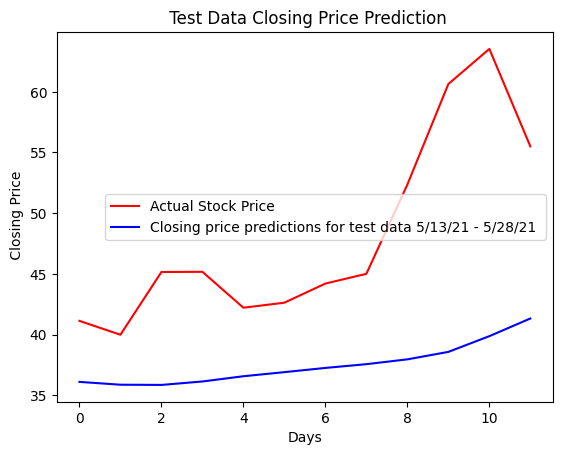

In [297]:
# Model stock price predictions for test data 5/13/21 - 5/28/21
plt.plot(original, color = 'red', label = 'Actual Stock Price')
plt.plot(pred, color = 'blue', label = 'Closing price predictions for test data 5/13/21 - 5/28/21 ')
plt.title(' Test Data Closing Price Prediction')
plt.xlabel('Days')
plt.ylabel(' Closing Price')
plt.legend()
plt.show()

# Retrospective Predictions and Evaluation - June

In [180]:
#get data for past 22 days from original dataframe
df_22_days_past=df.iloc[-22:,:]

In [181]:
df_22_days_past

,Close,High,Low,Open,Volume,compound,score
date,,,,,,,
2021-04-29,44.047501,45.215000,42.687500,44.139999,15041200,0.178848,5313.0
2021-04-30,43.397499,45.950001,43.174999,43.750000,17734400,0.151440,906.0
2021-05-03,40.549999,44.372501,39.902500,44.372501,21044000,0.163001,2461.0
2021-05-04,40.182499,40.372501,37.950001,39.750000,16030000,0.164782,7489.0
2021-05-05,39.869999,41.375000,39.582500,40.457500,11221600,0.165120,2536.0
2021-05-06,40.252499,41.180000,38.900002,40.215000,11771200,0.103610,4713.0
2021-05-07,40.277500,41.852501,39.375000,40.027500,11738400,0.153959,1177.0
2021-05-10,35.805000,40.397499,35.750000,40.327499,19226800,0.160667,2235.0
2021-05-11,36.730000,37.625000,34.125000,34.250000,18738400,0.171886,1497.0


In [182]:
#get data from June (which model was not trained on) and do not include closing prices
df_june_future=pd.read_csv("june_without_close.csv",parse_dates=["date"],index_col=[0])
df_june_future.shape

(22, 6)

In [183]:
df_june_future

,High,Low,Open,Volume,compound,score
date,,,,,,
2021-06-01,63.744999,56.767502,58.369999,38502400,0.176447,783
2021-06-02,73.500000,61.075001,62.220001,64076800,0.135441,3250
2021-06-03,68.607498,60.529999,66.427498,32000000,0.167384,8322
2021-06-04,66.250000,61.442501,64.004997,14550000,0.193930,1830
2021-06-07,70.500000,63.799999,64.500000,24206000,0.128329,5457
2021-06-08,86.165001,70.250000,73.000000,69756400,0.173790,7248
2021-06-09,82.000000,72.877502,75.779999,53717200,0.153630,2488
2021-06-10,72.000000,52.750000,70.500000,91920800,0.147456,18853
2021-06-11,60.282501,51.532501,55.587502,62323200,0.166354,2845


In [184]:
#rescale and concatenate everything
df_june_future["Close"]=0
df_june_future=df_june_future[["Close","High","Low","Open","Volume","compound","score"]]
old_scaled_array=scaler.transform(df_22_days_past)
new_scaled_array=scaler.transform(df_june_future)
new_scaled_df=pd.DataFrame(new_scaled_array)
new_scaled_df.iloc[:,0]=np.nan
full_df=pd.concat([pd.DataFrame(old_scaled_array),new_scaled_df]).reset_index().drop(["index"],axis=1)

In [185]:
full_df.shape

(44, 7)

In [186]:
full_df.head()

,0,1,2,3,4,5,6
0,0.481257,0.350125,0.626738,0.439385,-0.000272,0.280274,0.008708
1,0.473385,0.356448,0.634691,0.435080,0.003211,0.255922,0.001485
2,0.438897,0.342876,0.581304,0.441952,0.007490,0.266194,0.004033
3,0.434446,0.308462,0.549451,0.390926,0.001007,0.267776,0.012274
4,0.430661,0.317087,0.576084,0.398736,-0.005210,0.268076,0.004156


In [187]:
full_df.tail()

,0,1,2,3,4,5,6
39,NaN,0.450336,0.793344,0.562464,0.000261,0.207232,0.001629
40,NaN,0.421836,0.739916,0.542705,0.045928,0.247910,0.000715
41,NaN,0.443883,0.787634,0.535116,0.005517,0.248866,0.000526
42,NaN,0.424030,0.778702,0.541574,-0.006893,0.257865,0.000603
43,NaN,0.424159,0.774338,0.530811,-0.006585,0.241829,0.001690


In [188]:
full_df.shape

(44, 7)

In [189]:
full_df_scaled_array=full_df.values

In [190]:
full_df_scaled_array.shape

(44, 7)

In [191]:
#make predictions for each day in June
all_data=[]
time_step=22
for i in range(time_step,len(full_df_scaled_array)):
    data_x=[]
    data_x.append(full_df_scaled_array[i-time_step:i,0:full_df_scaled_array.shape[1]])
    data_x=np.array(data_x)
    prediction=my_model.predict(data_x)
    all_data.append(prediction)
    full_df.iloc[i,0]=prediction

1/1 [==============================] - 0s 21ms/step


In [192]:
all_data

[array([[0.5263711]], dtype=float32),
 array([[0.537662]], dtype=float32),
 array([[0.548254]], dtype=float32),
 array([[0.5573088]], dtype=float32),
 array([[0.56504893]], dtype=float32),
 array([[0.57188654]], dtype=float32),
 array([[0.58104646]], dtype=float32),
 array([[0.59020233]], dtype=float32),
 array([[0.5942614]], dtype=float32),
 array([[0.5940572]], dtype=float32),
 array([[0.5929265]], dtype=float32),
 array([[0.5908917]], dtype=float32),
 array([[0.5886538]], dtype=float32),
 array([[0.58710027]], dtype=float32),
 array([[0.58515227]], dtype=float32),
 array([[0.58231497]], dtype=float32),
 array([[0.57916415]], dtype=float32),
 array([[0.57583725]], dtype=float32),
 array([[0.5724889]], dtype=float32),
 array([[0.5688766]], dtype=float32),
 array([[0.56597483]], dtype=float32),
 array([[0.5636362]], dtype=float32)]

In [193]:
#scale back to original format
new_array=np.array(all_data)
new_array=new_array.reshape(-1,1)
prediction_copies_array = np.repeat(new_array,7, axis=-1)
y_pred_june = scaler.inverse_transform(np.reshape(prediction_copies_array,(len(new_array),7)))[:,0]

In [194]:
y_pred_june

array([47.77233 , 48.704563, 49.57909 , 50.3267  , 50.965763, 51.53031 ,
       52.286602, 53.042557, 53.377693, 53.360832, 53.267475, 53.099476,
       52.9147  , 52.786434, 52.625595, 52.391335, 52.131187, 51.856503,
       51.580048, 51.2818  , 51.04221 , 50.84912 ], dtype=float32)

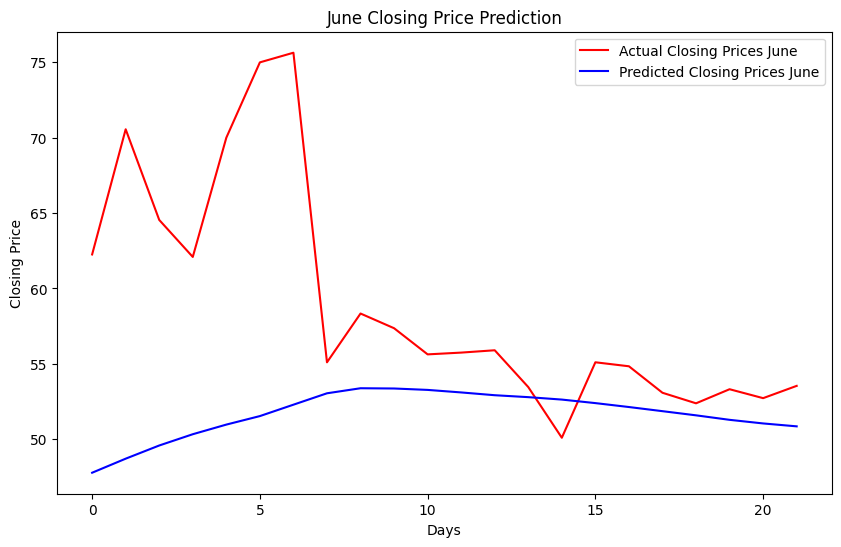

In [196]:
# Step 1: Load the CSV file
june_df = pd.read_csv('june_with_close.csv')

# Step 2: Extract the 'Close' column
actual_close_prices = june_df['Close']

# Step 3: Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(actual_close_prices, color='red', label='Actual Closing Prices June')
plt.plot(y_pred_june, color='blue', label='Predicted Closing Prices June')

plt.title('June Closing Price Prediction')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [299]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [298]:
y_pred_june = np.array(y_pred_june)
actual_close_prices = np.array(actual_close_prices)

In [300]:
# Calculate Mean Squared Error
mse = mean_squared_error(actual_close_prices, y_pred_june)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(actual_close_prices, y_pred_june)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 118.74492592122657
Root Mean Squared Error (RMSE): 10.897014541663536
Mean Absolute Error (MAE): 7.497675635597923


Predictions for July

Predictions for August

# Retrospective Predictions and Evaluation - July

In [301]:
split_date = pd.Timestamp('2021-07-01')
data_up_to_june = combined_df[combined_df.index < split_date]

In [302]:
df = data_up_to_june

In [303]:
df_21_days_past=df.iloc[-21:,:]

In [304]:
df_21_days_past

,Close,High,Low,Open,Volume,compound,score
date,,,,,,,
2021-06-02,70.559998,73.500000,61.075001,62.220001,64076800,0.135441,3250.0
2021-06-03,64.544998,68.607498,60.529999,66.427498,32000000,0.167384,8322.0
2021-06-04,62.090000,66.250000,61.442501,64.004997,14550000,0.193930,1830.0
2021-06-07,70.002502,70.500000,63.799999,64.500000,24206000,0.128329,5457.0
2021-06-08,75.000000,86.165001,70.250000,73.000000,69756400,0.173790,7248.0
2021-06-09,75.639999,82.000000,72.877502,75.779999,53717200,0.153630,2488.0
2021-06-10,55.097500,72.000000,52.750000,70.500000,91920800,0.147456,18853.0
2021-06-11,58.334999,60.282501,51.532501,55.587502,62323200,0.166354,2845.0
2021-06-14,57.360001,59.502499,54.799999,59.125000,28530400,0.140781,37278.0


In [307]:
df_july_future=pd.read_csv("july_without_close.csv",parse_dates=["date"],index_col=[0])
df_july_future.shape

(21, 6)

In [308]:
df_july_future

,High,Low,Open,Volume,compound,score
date,,,,,,
2021-07-01,54.207500,50.500000,53.349998,10968400,0.124028,394
2021-07-02,51.362499,49.125000,51.200001,10396400,0.193167,389
2021-07-06,51.192501,48.427502,51.000000,11072400,0.163452,372
2021-07-07,49.375000,44.389999,49.000000,16958000,0.144274,445
2021-07-08,48.555000,44.875000,44.957500,11430000,0.141121,514
2021-07-09,48.695000,46.687500,47.720001,6331600,0.131998,369
2021-07-12,49.437500,46.855000,47.855000,6545200,0.156281,336
2021-07-13,47.197498,44.750000,46.919998,9591600,0.194211,356
2021-07-14,45.595001,41.267502,45.122501,15655200,0.124347,617


In [311]:
df_july_future["Close"]=0
df_july_future=df_july_future[["Close","High","Low","Open","Volume","compound","score"]]
old_scaled_array=scaler.transform(df_21_days_past)
new_scaled_array=scaler.transform(df_july_future)
new_scaled_df=pd.DataFrame(new_scaled_array)
new_scaled_df.iloc[:,0]=np.nan
full_df=pd.concat([pd.DataFrame(old_scaled_array),new_scaled_df]).reset_index().drop(["index"],axis=1)

In [312]:
full_df.shape

(42, 7)

In [313]:
full_df.head()

,0,1,2,3,4,5,6
0,0.802368,0.593478,0.926710,0.638960,0.063133,0.241707,0.005327
1,0.729516,0.551385,0.917819,0.685404,0.021657,0.270088,0.013639
2,0.699782,0.531102,0.932705,0.658664,-0.000907,0.293674,0.002999
3,0.795616,0.567668,0.971165,0.664128,0.011579,0.235388,0.008944
4,0.856144,0.702443,1.076390,0.757955,0.070477,0.275780,0.011879


In [314]:
full_df.tail()

,0,1,2,3,4,5,6
37,NaN,0.361266,0.659407,0.449872,-0.013200,0.241537,0.000429
38,NaN,0.359030,0.650842,0.457157,-0.013437,0.260120,0.000485
39,NaN,0.342080,0.600310,0.437067,0.001490,0.251706,0.000677
40,NaN,0.335133,0.601289,0.422938,-0.008135,0.200877,0.000665
41,NaN,0.320786,0.578286,0.407484,-0.007426,0.232795,0.000585


In [315]:
full_df.shape

(42, 7)

In [316]:
full_df_scaled_array=full_df.values

In [317]:
full_df_scaled_array.shape

(42, 7)

In [318]:
all_data=[]
time_step=21
for i in range(time_step,len(full_df_scaled_array)):
    data_x=[]
    data_x.append(full_df_scaled_array[i-time_step:i,0:full_df_scaled_array.shape[1]])
    data_x=np.array(data_x)
    prediction=my_model.predict(data_x)
    all_data.append(prediction)
    full_df.iloc[i,0]=prediction

1/1 [==============================] - 0s 18ms/step


In [319]:
all_data

[array([[0.49083993]], dtype=float32),
 array([[0.48806456]], dtype=float32),
 array([[0.48368773]], dtype=float32),
 array([[0.47883078]], dtype=float32),
 array([[0.47285804]], dtype=float32),
 array([[0.46711475]], dtype=float32),
 array([[0.4624958]], dtype=float32),
 array([[0.4587938]], dtype=float32),
 array([[0.45515904]], dtype=float32),
 array([[0.45021528]], dtype=float32),
 array([[0.44436422]], dtype=float32),
 array([[0.439483]], dtype=float32),
 array([[0.43491748]], dtype=float32),
 array([[0.4321861]], dtype=float32),
 array([[0.4316527]], dtype=float32),
 array([[0.4316052]], dtype=float32),
 array([[0.43125644]], dtype=float32),
 array([[0.43144572]], dtype=float32),
 array([[0.43194503]], dtype=float32),
 array([[0.4313882]], dtype=float32),
 array([[0.43007496]], dtype=float32)]

In [321]:
new_array=np.array(all_data)
new_array=new_array.reshape(-1,1)
prediction_copies_array = np.repeat(new_array,7, axis=-1)
y_pred_july = scaler.inverse_transform(np.reshape(prediction_copies_array,(len(new_array),7)))[:,0]

In [322]:
y_pred_july

array([44.8387  , 44.60955 , 44.24818 , 43.847164, 43.354027, 42.87983 ,
       42.498466, 42.19281 , 41.892708, 41.484524, 41.001434, 40.598415,
       40.221462, 39.995945, 39.95191 , 39.947983, 39.91919 , 39.93482 ,
       39.976044, 39.93007 , 39.82164 ], dtype=float32)

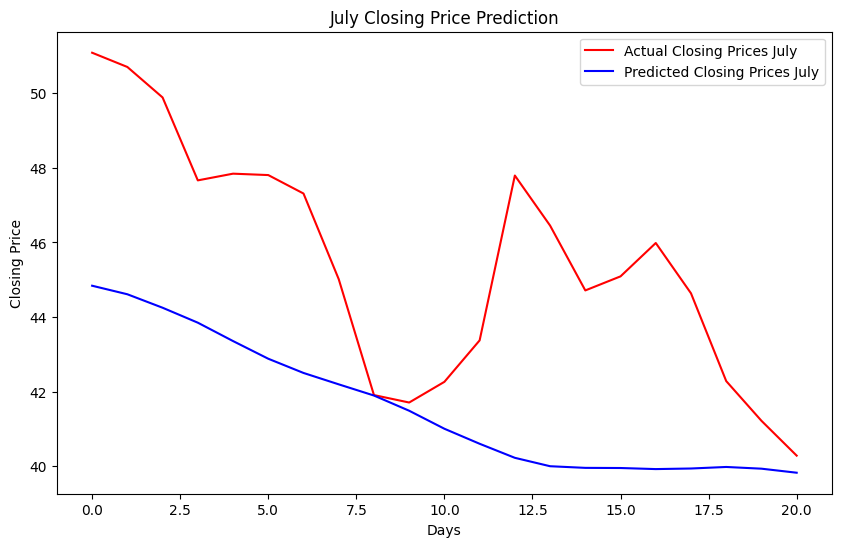

In [324]:
# Step 1: Load the CSV file
july_df = pd.read_csv('july_with_close.csv')

# Step 2: Extract the 'Close' column
actual_close_prices = july_df['Close']

# Step 3: Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(actual_close_prices, color='red', label='Actual Closing Prices July')
plt.plot(y_pred_june, color='blue', label='Predicted Closing Prices July')

plt.title('July Closing Price Prediction')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [325]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [326]:
y_pred_july = np.array(y_pred_july)
actual_close_prices = np.array(actual_close_prices)

In [327]:
# Calculate Mean Squared Error
mse = mean_squared_error(actual_close_prices, y_pred_july)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(actual_close_prices, y_pred_july)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 20.085368735533617
Root Mean Squared Error (RMSE): 4.4816703064296926
Mean Absolute Error (MAE): 3.8988156998400307


# Retrospective Predictions and Evaluation - August

In [328]:
split_date = pd.Timestamp('2021-08-01')
data_up_to_july = combined_df[combined_df.index < split_date]

In [329]:
df = data_up_to_july

In [330]:
df_22_days_past=df.iloc[-22:,:]

In [331]:
df_22_days_past

,Close,High,Low,Open,Volume,compound,score
date,,,,,,,
2021-06-30,53.535000,53.820000,51.735001,52.422501,10158400,0.135578,1031.0
2021-07-01,51.090000,54.207500,50.500000,53.349998,10968400,0.124028,394.0
2021-07-02,50.707500,51.362499,49.125000,51.200001,10396400,0.193167,389.0
2021-07-06,49.889999,51.192501,48.427502,51.000000,11072400,0.163452,372.0
2021-07-07,47.665001,49.375000,44.389999,49.000000,16958000,0.144274,445.0
2021-07-08,47.845001,48.555000,44.875000,44.957500,11430000,0.141121,514.0
2021-07-09,47.807499,48.695000,46.687500,47.720001,6331600,0.131998,369.0
2021-07-12,47.312500,49.437500,46.855000,47.855000,6545200,0.156281,336.0
2021-07-13,45.014999,47.197498,44.750000,46.919998,9591600,0.194211,356.0


In [332]:
df_august_future=pd.read_csv("august_without_close.csv",parse_dates=["date"],index_col=[0])
df_august_future.shape

(22, 6)

In [333]:
df_august_future

,High,Low,Open,Volume,compound,score
date,,,,,,
2021-08-02,40.897499,38.764999,40.500000,10131600,0.133893,307
2021-08-03,39.722500,37.049999,39.185001,57802400,0.094858,429
2021-08-04,39.447498,36.422501,38.182499,9574000,0.116303,350
2021-08-05,39.400002,36.305000,37.000000,9648400,0.139867,389
2021-08-06,39.125000,37.577499,38.647499,5410800,0.116863,304
2021-08-09,41.177502,37.665001,37.950001,8996800,0.139054,347
2021-08-10,41.724998,38.837502,40.340000,6493200,0.125268,336
2021-08-11,39.762501,38.654999,39.607498,3781600,0.132686,369
2021-08-12,41.070000,39.332500,39.970001,5271200,0.070262,367


In [334]:
df_august_future["Close"]=0
df_august_future=df_august_future[["Close","High","Low","Open","Volume","compound","score"]]
old_scaled_array=scaler.transform(df_22_days_past)
new_scaled_array=scaler.transform(df_august_future)
new_scaled_df=pd.DataFrame(new_scaled_array)
new_scaled_df.iloc[:,0]=np.nan
full_df=pd.concat([pd.DataFrame(old_scaled_array),new_scaled_df]).reset_index().drop(["index"],axis=1)

In [335]:
full_df.shape

(44, 7)

In [336]:
full_df.head()

,0,1,2,3,4,5,6
0,0.596167,0.424159,0.774338,0.530811,-0.006585,0.241829,0.001690
1,0.566554,0.427493,0.754191,0.541049,-0.005538,0.231566,0.000646
2,0.561921,0.403016,0.731759,0.517317,-0.006277,0.292996,0.000638
3,0.552020,0.401553,0.720380,0.515109,-0.005403,0.266595,0.000610
4,0.525071,0.385916,0.654513,0.493032,0.002207,0.249555,0.000729


In [337]:
full_df.tail()

,0,1,2,3,4,5,6
39,NaN,0.449368,0.717484,0.522422,0.046799,0.240203,0.000675
40,NaN,0.427859,0.741955,0.505947,0.012546,0.229473,0.000493
41,NaN,0.419255,0.746115,0.525319,-0.003010,0.243070,0.000479
42,NaN,0.430418,0.758351,0.517868,-0.002603,0.231499,0.000438
43,NaN,0.439258,0.792773,0.539117,-0.001231,0.224547,0.000462


In [338]:
full_df.shape

(44, 7)

In [339]:
full_df_scaled_array=full_df.values

In [340]:
full_df_scaled_array.shape

(44, 7)

In [341]:
all_data=[]
time_step=22
for i in range(time_step,len(full_df_scaled_array)):
    data_x=[]
    data_x.append(full_df_scaled_array[i-time_step:i,0:full_df_scaled_array.shape[1]])
    data_x=np.array(data_x)
    prediction=my_model.predict(data_x)
    all_data.append(prediction)
    full_df.iloc[i,0]=prediction

1/1 [==============================] - 0s 20ms/step


In [342]:
all_data

[array([[0.4321634]], dtype=float32),
 array([[0.42801648]], dtype=float32),
 array([[0.4243999]], dtype=float32),
 array([[0.4195599]], dtype=float32),
 array([[0.4146598]], dtype=float32),
 array([[0.41062325]], dtype=float32),
 array([[0.4074228]], dtype=float32),
 array([[0.4054036]], dtype=float32),
 array([[0.40400118]], dtype=float32),
 array([[0.40322143]], dtype=float32),
 array([[0.40297848]], dtype=float32),
 array([[0.40335602]], dtype=float32),
 array([[0.4041909]], dtype=float32),
 array([[0.40474442]], dtype=float32),
 array([[0.40456274]], dtype=float32),
 array([[0.40490738]], dtype=float32),
 array([[0.4058087]], dtype=float32),
 array([[0.40886545]], dtype=float32),
 array([[0.4156258]], dtype=float32),
 array([[0.42353183]], dtype=float32),
 array([[0.43125156]], dtype=float32),
 array([[0.4385783]], dtype=float32)]

In [345]:
new_array=np.array(all_data)
new_array=new_array.reshape(-1,1)
prediction_copies_array = np.repeat(new_array,7, axis=-1)
y_pred_august = scaler.inverse_transform(np.reshape(prediction_copies_array,(len(new_array),7)))[:,0]

In [346]:
y_pred_august

array([39.994072, 39.651684, 39.35308 , 38.953465, 38.54889 , 38.21561 ,
       37.951366, 37.784653, 37.668858, 37.604477, 37.58442 , 37.61559 ,
       37.684525, 37.730225, 37.715225, 37.74368 , 37.818096, 38.070477,
       38.628647, 39.281406, 39.918785, 40.52372 ], dtype=float32)

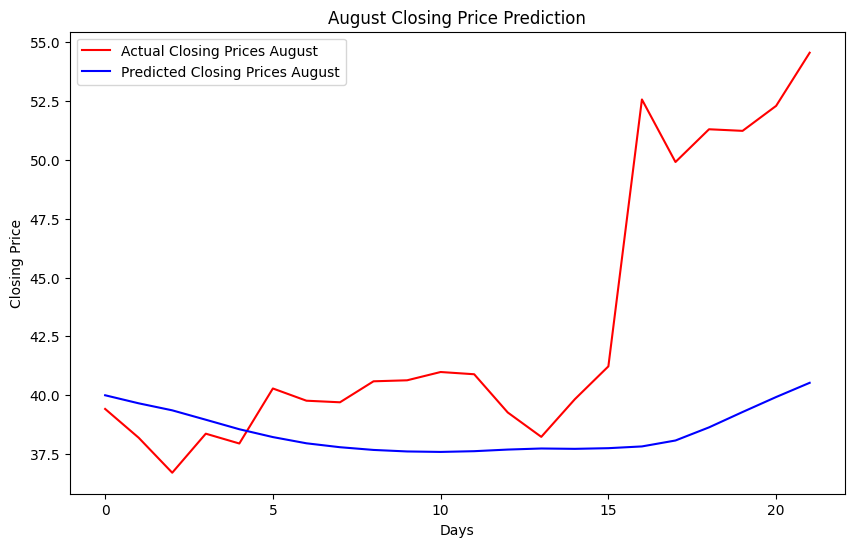

In [347]:
# Step 1: Load the CSV file
august_df = pd.read_csv('august_with_close.csv')

# Step 2: Extract the 'Close' column
actual_close_prices = august_df['Close']

# Step 3: Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(actual_close_prices, color='red', label='Actual Closing Prices August')
plt.plot(y_pred_june, color='blue', label='Predicted Closing Prices August')

plt.title('August Closing Price Prediction')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [348]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [349]:
y_pred_august = np.array(y_pred_august)
actual_close_prices = np.array(actual_close_prices)

In [350]:
# Calculate Mean Squared Error
mse = mean_squared_error(actual_close_prices, y_pred_august)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(actual_close_prices, y_pred_august)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 49.66049443922812
Root Mean Squared Error (RMSE): 7.047020252505885
Mean Absolute Error (MAE): 4.9822242041202065


# Event Analysis

In [ ]:
!pip install spacy

In [ ]:
!python -m spacy download en_core_web_md

In [3]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import numpy as np

In [38]:
#read in data, fix dates, and make the date the index
reddit_df = pd.read_csv('rGME_dataset_features.csv')
reddit_df['date'] = pd.to_datetime(reddit_df['date'], origin='1899-12-30', unit='D')
reddit_df.set_index('date', inplace=True)
reddit_df.head()

,Unnamed: 0,title,score,num_comments,compound
date,,,,,
2021-01-04,0,You NEED to see this about GME 🚀🚀🚀🚀🚀🚀,1,9,0.9872
2021-01-04,1,Short Squeeze Incoming 🚀🚀🚀🚀🚀🚀🚀,1,1,0.9906
2021-01-05,2,THIS CONVINCED ME TO ALL IN 💰GME (EXTREME PUMP...,1,6,0.5319
2021-01-05,3,You already know what we must do brothers and ...,1,4,-0.2960
2021-01-06,4,ICR conference (11th Jan),1,10,0.0000


In [39]:
# Filter for January 2021
january_2021_df = reddit_df[(reddit_df.index.month == 1) & (reddit_df.index.year == 2021)]

In [40]:
len(january_2021_df)

6947

In [41]:
# Load spaCy model
nlp = spacy.load("en_core_web_md")

# Function to check if a title mentions GameStop
def mentions_gamestop(title):
    doc = nlp(title)
    return any("gamestop" in ent.text.lower() or "gme" in ent.text.lower() or "game stop" in ent.text.lower() for ent in doc.ents)

# Apply the function to each title and add a new column for the result
january_2021_df['mentions_gamestop'] = january_2021_df['title'].apply(mentions_gamestop)

# Group by week and count the number of True values in 'mentions_gamestop'
weekly_mentions = january_2021_df.resample('D').mentions_gamestop.sum()

<ipython-input-41-16e5005471ae>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  january_2021_df['mentions_gamestop'] = january_2021_df['title'].apply(mentions_gamestop)


In [42]:
print(weekly_mentions)

date
2021-01-04      1
2021-01-05      1
2021-01-06      1
2021-01-07      0
2021-01-08      0
2021-01-09      0
2021-01-10      1
2021-01-11      1
2021-01-12      0
2021-01-13      6
2021-01-14      2
2021-01-15      3
2021-01-16      1
2021-01-17      4
2021-01-18      2
2021-01-19      2
2021-01-20      1
2021-01-21      3
2021-01-22     21
2021-01-23     14
2021-01-24     16
2021-01-25     51
2021-01-26     22
2021-01-27    178
2021-01-28    366
2021-01-29    215
2021-01-30    127
2021-01-31    141
Freq: D, Name: mentions_gamestop, dtype: int64


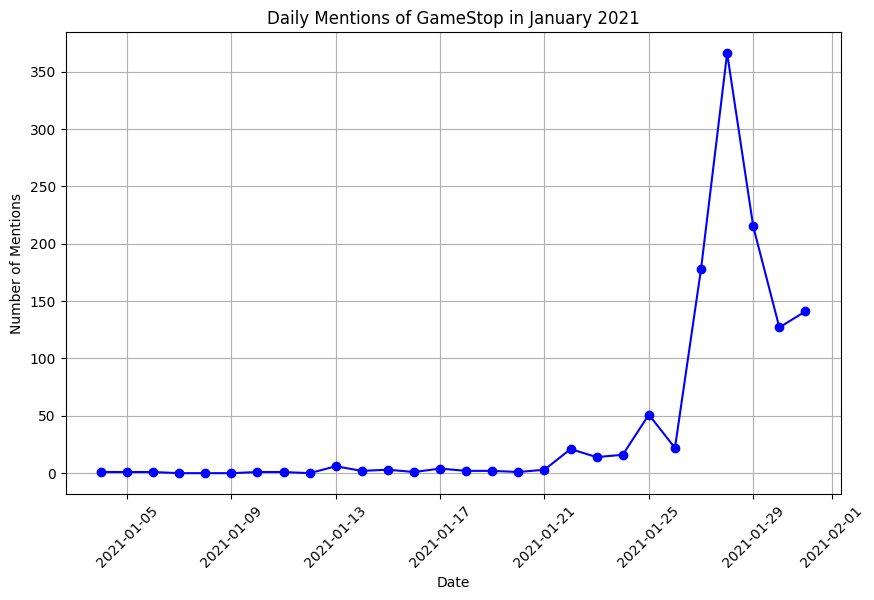

In [46]:
# Plotting the data
plt.figure(figsize=(10, 6))  # Sets the figure size
plt.plot(weekly_mentions.index, weekly_mentions, marker='o', color='b')  # Plotting the series

# Adding title and labels
plt.title('Daily Mentions of GameStop in January 2021')
plt.xlabel('Date')
plt.ylabel('Number of Mentions')
plt.grid(True)  # Adds a grid for easier readability
plt.xticks(rotation=45)  # Rotates the x-axis labels for better readability

# Display the plot
plt.show()


In [47]:
january_2021_df['sentiment_change'] = january_2021_df['compound'].diff()

<ipython-input-47-813c503cd9a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  january_2021_df['sentiment_change'] = january_2021_df['compound'].diff()


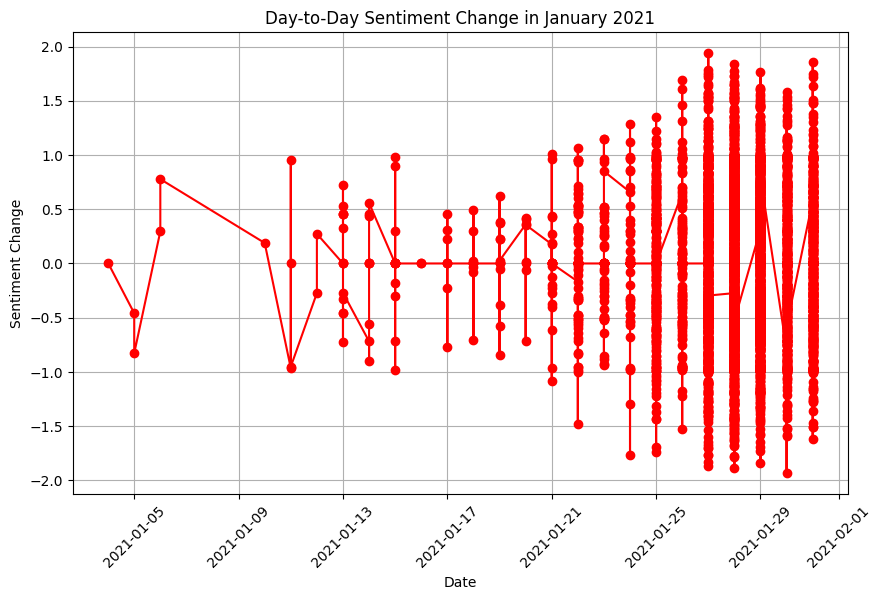

In [48]:
# Plotting the sentiment change
plt.figure(figsize=(10, 6))  # Sets the figure size
plt.plot(january_2021_df.index, january_2021_df['sentiment_change'], marker='o', color='r')  # Plotting the series

# Adding title and labels
plt.title('Day-to-Day Sentiment Change in January 2021')
plt.xlabel('Date')
plt.ylabel('Sentiment Change')
plt.grid(True)  # Adds a grid for easier readability
plt.xticks(rotation=45)  # Rotates the x-axis labels for better readability

# Display the plot
plt.show()

In [49]:
!pip install scikit-learn

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [51]:
january_2021_df['week'] = january_2021_df.index.week

<ipython-input-51-d8b3c8a88a53>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  january_2021_df['week'] = january_2021_df.index.week
<ipython-input-51-d8b3c8a88a53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  january_2021_df['week'] = january_2021_df.index.week


In [53]:
# Number of topics
n_topics = 5  # Adjust as needed

# Create a CountVectorizer for LDA
vectorizer = CountVectorizer(stop_words='english')

for week in january_2021_df['week'].unique():
    # Filter data for the week
    weekly_data = january_2021_df[january_2021_df['week'] == week]

    # Apply CountVectorizer
    dtm = vectorizer.fit_transform(weekly_data['title'])

    # Create and fit LDA model
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
    lda.fit(dtm)

    # Display topics
    print(f"Week: {week}")
    for i, topic in enumerate(lda.components_):
        print(f"Topic {i}:")
        try:
            feature_names = vectorizer.get_feature_names()
        except AttributeError:  # for newer versions
            feature_names = vectorizer.get_feature_names_out()
        print(" ".join([feature_names[index] for index in topic.argsort()[-10:]]))
    print("\n")



Week: 1
Topic 0:
pump squeeze incoming short need gme icr conference jan 11th
Topic 1:
know coming extreme convinced pump gme need incoming short squeeze
Topic 2:
know coming extreme convinced pump incoming short squeeze need gme
Topic 3:
analysis guys free pretty discord channel active high hey gme
Topic 4:
gme coming extreme convinced pump brothers submit sisters complaint know


Week: 2
Topic 0:
group downvote absolute dont alright hell pits today buy gme
Topic 1:
small brilliant guy calls sold question view cohen ryan gme
Topic 2:
chart technical sees 2021 17 01 stock set right time
Topic 3:
seatbelts tendie youre going begun moon sell squeeze short gme
Topic 4:
pltr wtf 1000 3500 late people board cohen gme dip


Week: 3
Topic 0:
hours private chat going discussion wallstreetbets short monday gme squeeze
Topic 1:
squeeze options price make hold short shares wsb buy gme
Topic 2:
people baby 50 gang late selling moon don sell gme
Topic 3:
fucking don need buy limit monday gamestop l

# Model Sensitivity

In [8]:
!pip install yfinance

In [9]:
august_predictions = [39.994072, 39.651684, 39.35308 , 38.953465, 38.54889 , 38.21561 ,
       37.951366, 37.784653, 37.668858, 37.604477, 37.58442 , 37.61559 ,
       37.684525, 37.730225, 37.715225, 37.74368 , 37.818096, 38.070477,
       38.628647, 39.281406, 39.918785, 40.52372 ]

In [31]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol
tickerSymbol = 'GME'

# Get data on this ticker
august_actual = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
august_actual = august_actual.history(period='1d', start='2021-08-01', end='2021-09-01')

In [11]:
august_actual.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-08-02 00:00:00-04:00,40.500000,40.897499,38.764999,39.412498,10131600,0.0,0.0
2021-08-03 00:00:00-04:00,39.185001,39.722500,37.049999,38.187500,57802400,0.0,0.0
2021-08-04 00:00:00-04:00,38.182499,39.447498,36.422501,36.700001,9574000,0.0,0.0
2021-08-05 00:00:00-04:00,37.000000,39.400002,36.305000,38.360001,9648400,0.0,0.0
2021-08-06 00:00:00-04:00,38.647499,39.125000,37.577499,37.942501,5410800,0.0,0.0


In [12]:
august_actual.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-08-25 00:00:00-04:00,51.662498,56.750000,48.250000,49.912498,51444400,0.0,0.0
2021-08-26 00:00:00-04:00,50.169998,54.250000,49.750000,51.305000,24954400,0.0,0.0
2021-08-27 00:00:00-04:00,51.924999,53.250000,50.005001,51.237499,12923200,0.0,0.0
2021-08-30 00:00:00-04:00,51.250000,54.547501,50.755001,52.299999,13238400,0.0,0.0
2021-08-31 00:00:00-04:00,53.174999,55.575001,52.865002,54.560001,14298800,0.0,0.0


In [32]:
# Assuming your DataFrame is named df
august_dates = august_actual.index.tolist()

In [35]:
august_actual = august_actual['Close'].tolist()

In [36]:
len(august_actual)

22

In [15]:
len(august_predictions)

22

In [16]:
def calculate_percentage_changes(values):
    # Calculate and return the percentage change between each consecutive pair of values in the list
    return [100.0 * (b - a) / a if a != 0 else 0 for a, b in zip(values, values[1:])]

# Calculate percentage changes for actual and predicted values
actual_percentage_changes = calculate_percentage_changes(august_actual)
predicted_percentage_changes = calculate_percentage_changes(august_predictions)

# Find the largest (by absolute value) percentage change in actual and predicted values
biggest_change_actual = max(actual_percentage_changes, key=abs)
biggest_change_predicted = max(predicted_percentage_changes, key=abs)

# Find the indices (days) of the biggest percentage changes in actual and predicted values
index_biggest_change_actual = actual_percentage_changes.index(biggest_change_actual)
index_biggest_change_predicted = predicted_percentage_changes.index(biggest_change_predicted)

# Print the biggest percentage changes and their corresponding indices
print("Biggest percentage change in actual values:", biggest_change_actual)
print("At index (day):", index_biggest_change_actual)
print("Biggest percentage change in predicted values:", biggest_change_predicted)
print("At index (day):", index_biggest_change_predicted)

Biggest percentage change in actual values: 27.533503586958304
At index (day): 15
Biggest percentage change in predicted values: 1.689831383428977
At index (day): 18


In [37]:
print(august_dates[15])

2021-08-23 00:00:00-04:00


In [17]:
#read in data, fix dates, and make the date the index
reddit_df = pd.read_csv('rGME_dataset_features.csv')
reddit_df['date'] = pd.to_datetime(reddit_df['date'], origin='1899-12-30', unit='D')
reddit_df.set_index('date', inplace=True)
reddit_df.head()

,Unnamed: 0,title,score,num_comments,compound
date,,,,,
2021-01-04,0,You NEED to see this about GME 🚀🚀🚀🚀🚀🚀,1,9,0.9872
2021-01-04,1,Short Squeeze Incoming 🚀🚀🚀🚀🚀🚀🚀,1,1,0.9906
2021-01-05,2,THIS CONVINCED ME TO ALL IN 💰GME (EXTREME PUMP...,1,6,0.5319
2021-01-05,3,You already know what we must do brothers and ...,1,4,-0.2960
2021-01-06,4,ICR conference (11th Jan),1,10,0.0000


In [22]:
reddit_aggregated_df = reddit_df.groupby('date').agg({
    'compound': 'mean',  # Average compound score for each day
    'score': 'sum'       # Sum of scores for each day
}).reset_index()

In [24]:
reddit_aggregated_df.head()

,date,compound,score
0,2021-01-04,0.988900,2
1,2021-01-05,0.117950,2
2,2021-01-06,0.388850,2
3,2021-01-10,0.966700,1
4,2021-01-11,0.237925,5


In [25]:
# Assuming reddit_df has been loaded and aggregated as shown
reddit_aggregated_df['date'] = pd.to_datetime(reddit_aggregated_df['date'])
reddit_aggregated_df.set_index('date', inplace=True)

# Calculate day-to-day changes in average compound score
reddit_aggregated_df['compound_change'] = reddit_aggregated_df['compound'].diff()

# Filter for August 2021
august_df = reddit_aggregated_df['2021-08']

# Identify the dates with the largest changes
largest_changes = august_df['compound_change'].nlargest(5)

print(largest_changes)


date
2021-08-13    0.090205
2021-08-24    0.057948
2021-08-07    0.054257
2021-08-19    0.041381
2021-08-05    0.023564
Name: compound_change, dtype: float64


<ipython-input-25-2f7ab2987e05>:9: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  august_df = reddit_aggregated_df['2021-08']


# Sources

https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/TUMIPC

https://github.com/sksujan58/Multivariate-time-series-forecasting-using-LSTM

https://medium.com/@786sksujanislam786/multivariate-time-series-forecasting-using-lstm-4f8a9d32a509